In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory

from utils import compute_difficulty_index, compute_bmi


### ```cyclists``` dataset

In [2]:
cyclists_df = pd.read_csv('dataset/cyclists_clustering_connect.csv')

In [3]:
print(cyclists_df.columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'weighted_podiums',
       'career_level', 'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


In [4]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'weighted_podiums',
       'career_level', 'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

Take only numerical columns 

In [5]:
# ALL numeric columns: 
# ['birth_year', 'cyclist_win', 'carreer_level', 'best_position', 'best_position_std', 'cyclist_experience', weighted_podiums]

columns_preserve = [ 'birth_year', 'career_level', 'avg_position', 'cyclist_experience' ]

# Create a new dataset with only the specified columns
cyclists_df = cyclists_df[columns_preserve]



Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,birth_year,career_level,avg_position,cyclist_experience
0,0.426471,0.172575,0.354463,0.225026
1,0.882353,0.013677,0.496724,0.043113
2,0.867647,0.085337,0.470499,0.160883
3,0.897059,0.018390,0.380707,0.042061
4,0.764706,0.086925,0.528734,0.395373
...,...,...,...,...
4011,0.676471,0.009089,0.462110,0.014721
4012,0.911765,0.006796,0.478362,0.018927
4013,0.544118,0.001044,0.607511,0.004206
4014,0.720588,0.047340,0.403854,0.110410


# **K-menas** of cyclists dataset 

### **Best k**

In [7]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 236.49945269180694
k: 3, SSE: 157.8904163517118
k: 4, SSE: 121.82119524740008
k: 5, SSE: 105.263999083577
k: 6, SSE: 93.95640924254633
k: 7, SSE: 83.48520858598451
k: 8, SSE: 74.90025541822794
k: 9, SSE: 68.43803377315736
k: 10, SSE: 64.0151273263968
k: 15, SSE: 47.84400759812375
k: 20, SSE: 39.092825398972465


In [8]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 236.49945269180694
Separation 1.1304630774608937
Silhouette 0.34808540392388115
for k = 3
SSE 157.8904163517118
Separation 0.9122178560890357
Silhouette 0.3896384476792302
for k = 4
SSE 121.82119524740008
Separation 0.9676048184463597
Silhouette 0.3417579127534252
for k = 5
SSE 105.263999083577
Separation 1.0315132715151911
Silhouette 0.3041843168693946
for k = 6
SSE 93.95640924254633
Separation 1.0566264748620307
Silhouette 0.29596902430522704
for k = 7
SSE 83.48520858598451
Separation 1.0083370649023424
Silhouette 0.3073220149049839
for k = 8
SSE 74.90025541822794
Separation 1.0159341467965346
Silhouette 0.3006599542992888
for k = 9
SSE 68.43803377315736
Separation 1.031917266591106
Silhouette 0.28986182189342646
for k = 10
SSE 64.0151273263968
Separation 1.0262487596053442
Silhouette 0.2729745797777721
for k = 15
SSE 47.84400759812375
Separation 1.0185612217967972
Silhouette 0.2736624140713529
for k = 20
SSE 39.092825398972465
Separation 1.0281038251686887
Silhouette 0

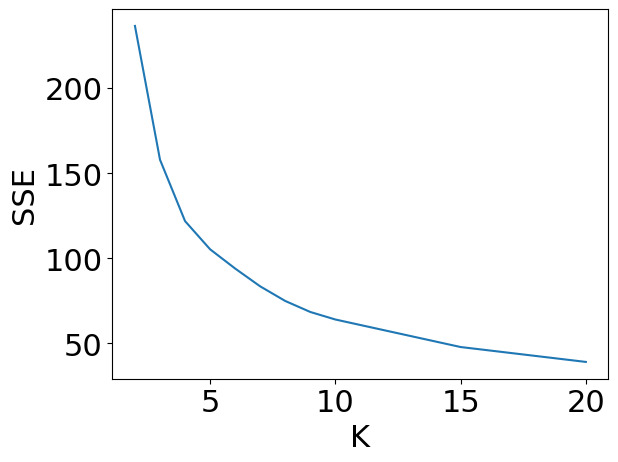

In [9]:

sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.show()

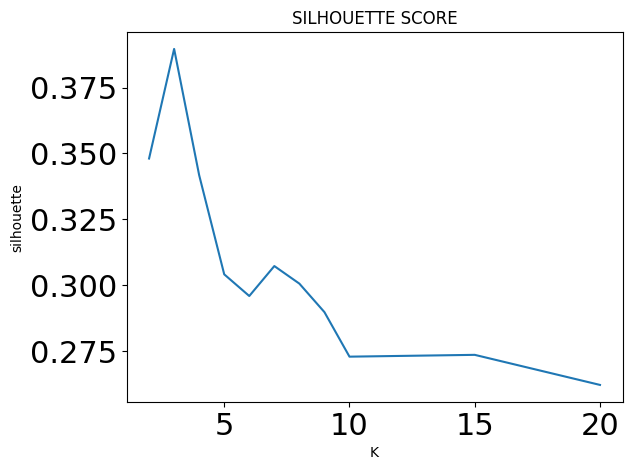

In [10]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

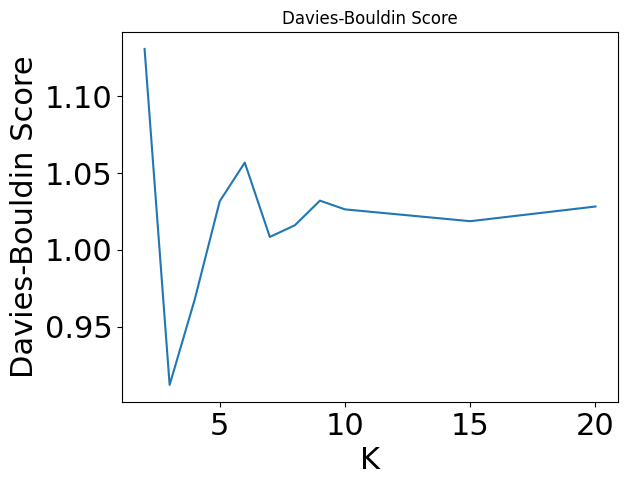

In [11]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.show()

### **K-means resuslts** (cyclists dataset)

In [12]:
#RETRAIN BEST K-MEANS
best_k = 5
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=5, random_state=0)

In [13]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1243, 1052, 325, 716, 680]


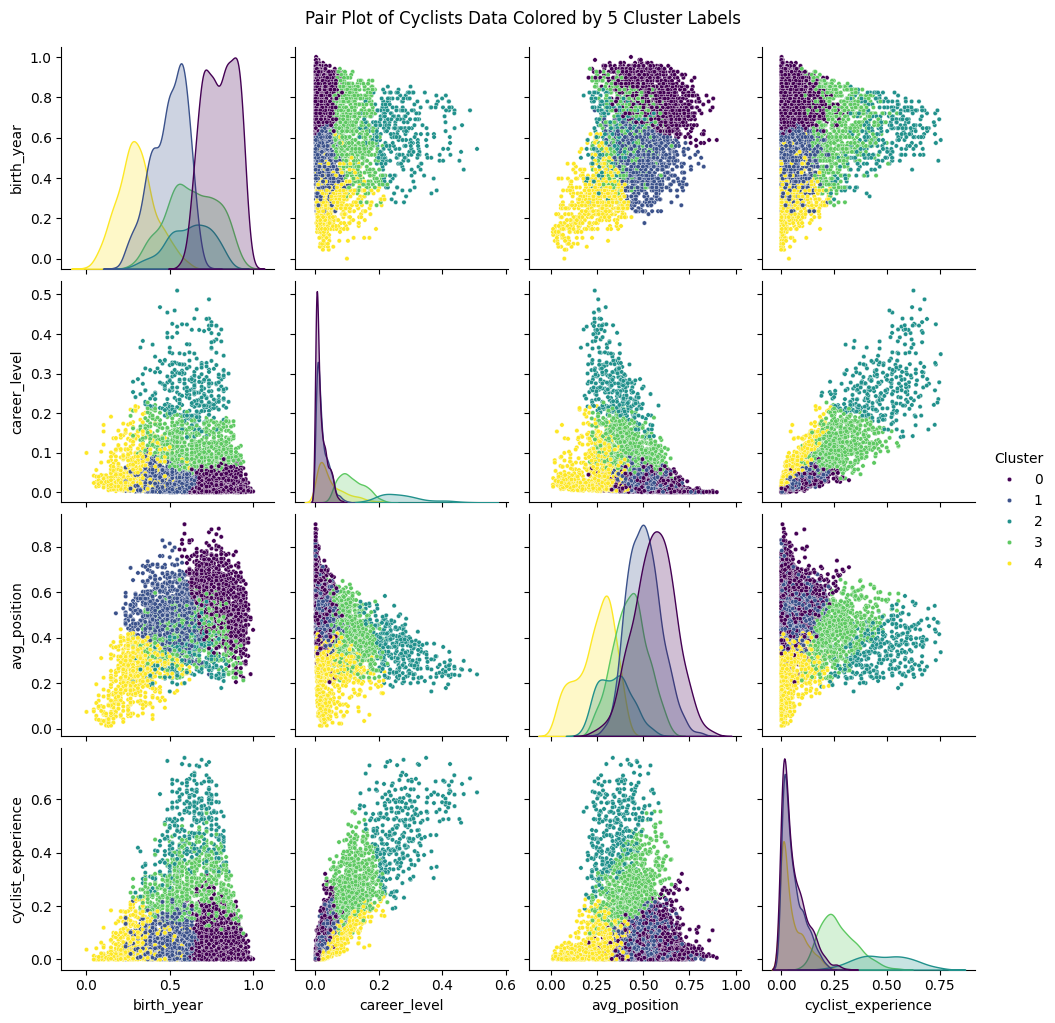

In [14]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

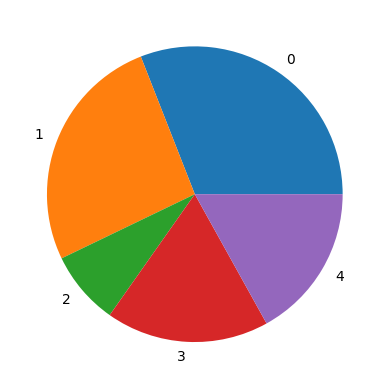

In [15]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### **Radar plot**

0
1
2
3
4


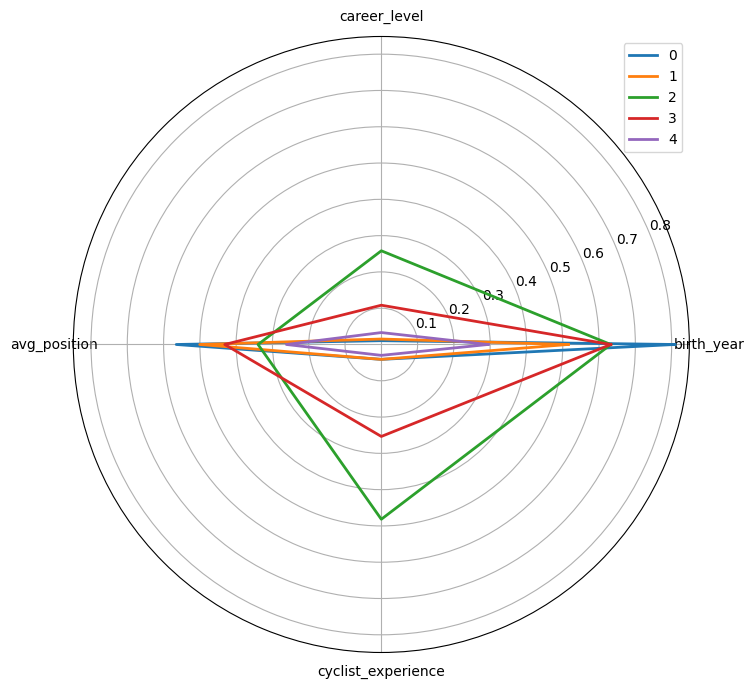

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

### ```races``` dataset

In [17]:
races_df = pd.read_csv('dataset/races_clustering.csv')

In [18]:
print(races_df.columns)

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'is_tarmac', 'start_date', 'duration',
       'average_age', 'season', 'avg_slope'],
      dtype='object')


In [19]:
numeric_columns = races_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['points', 'length', 'climb_total', 'profile', 'startlist_quality',
       'average_age', 'avg_slope'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

In [20]:
# ALL numeric columns: 
# ['points', 'length', 'climb_total', 'profile', 'startlist_quality','average_age', 'avg_slope']

columns_preserve = ['length', 'climb_total', 'profile', 'startlist_quality','average_age']

# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,length,climb_total,profile,startlist_quality,average_age
0,256500.0,3300.0,2.0,1251.0,28.291667
1,251800.0,3500.0,2.0,1149.0,29.061224
2,251400.0,3495.0,2.0,1140.0,28.788618
3,258000.0,3558.0,3.0,1175.0,29.240310
4,248700.0,3320.0,2.0,1120.0,28.883333
...,...,...,...,...,...
2609,258000.0,5020.0,4.0,1374.0,29.039474
2610,260700.0,3220.0,2.0,1443.0,28.413043
2611,258200.0,4662.0,2.0,1008.0,28.590909
2612,268300.0,2250.0,2.0,1357.0,28.544118


## **K-means** for reaces dataset

#### **Best K**

In [22]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 2834251918921.2466
k: 3, SSE: 1240361959673.9172
k: 4, SSE: 722891761694.0995
k: 5, SSE: 484475790350.68195
k: 6, SSE: 359782442235.1281
k: 7, SSE: 277842139309.1197
k: 8, SSE: 206800201893.7041
k: 9, SSE: 162773576496.93054
k: 10, SSE: 130240400300.67148
k: 15, SSE: 59092080503.519585
k: 20, SSE: 36675918116.23866


In [23]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 2834251918921.2466
Separation 0.347886571839206
Silhouette 0.7368467882314214
for k = 3
SSE 1240361959673.9172
Separation 0.5131004599502543
Silhouette 0.5647241291356032
for k = 4
SSE 722891761694.0995
Separation 0.5095332309730541
Silhouette 0.5522528959913001
for k = 5
SSE 484475790350.68195
Separation 0.5069892272589928
Silhouette 0.5502937644558898
for k = 6
SSE 359782442235.1281
Separation 0.5033872170525201
Silhouette 0.5406295526709407
for k = 7
SSE 277842139309.1197
Separation 0.5312641871107662
Silhouette 0.525522194550137
for k = 8
SSE 206800201893.7041
Separation 0.5202290622406801
Silhouette 0.5304343719762225
for k = 9
SSE 162773576496.93054
Separation 0.5205998932068135
Silhouette 0.5333732867763827
for k = 10
SSE 130240400300.67148
Separation 0.49339496303719416
Silhouette 0.5401019288439332
for k = 15
SSE 59092080503.519585
Separation 0.5153625309535447
Silhouette 0.5171151176361606
for k = 20
SSE 36675918116.23866
Separation 0.551117260185457
Silhouette 

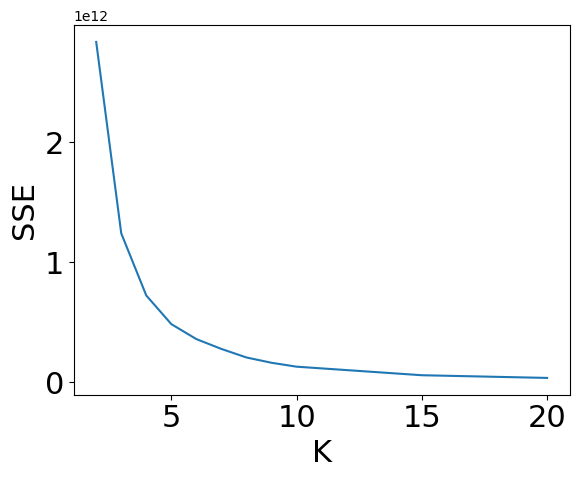

In [24]:

sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.show()

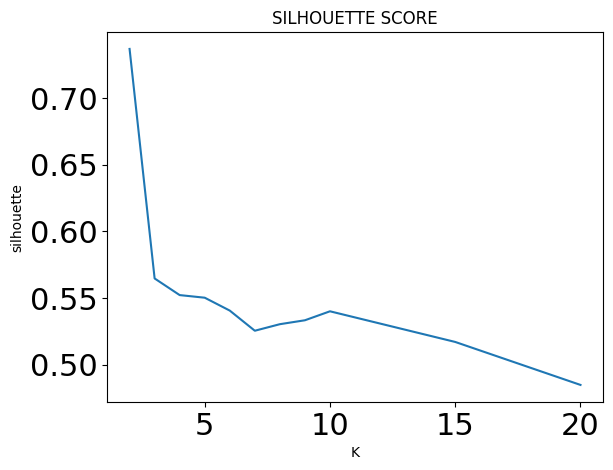

In [25]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

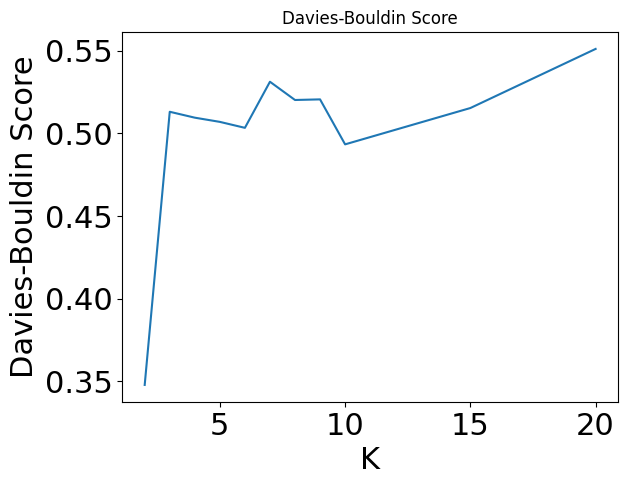

In [26]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.show()

### **K-means resuslts** (races datastet)

In [27]:
#RETRAIN BEST K-MEANS
best_k = 4
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [28]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1179, 714, 368, 353]


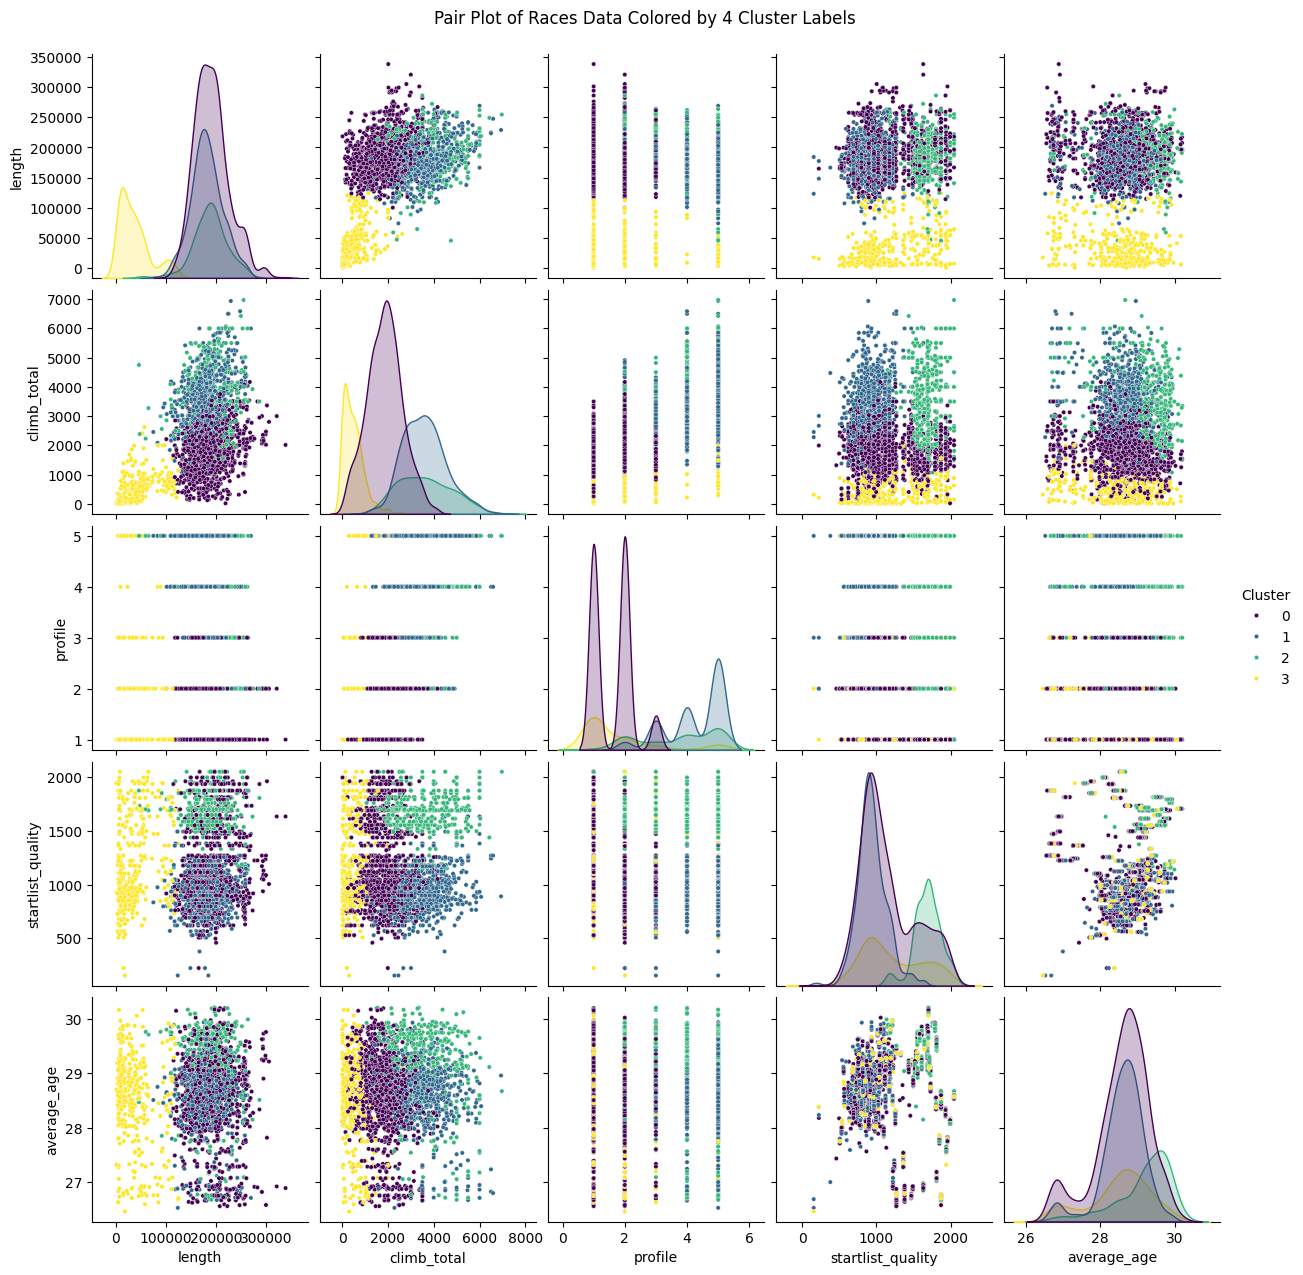

In [29]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

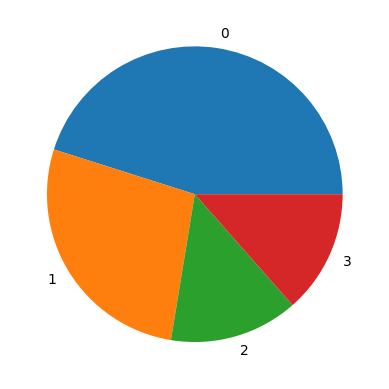

In [30]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### **Radar plot**

0
1
2
3


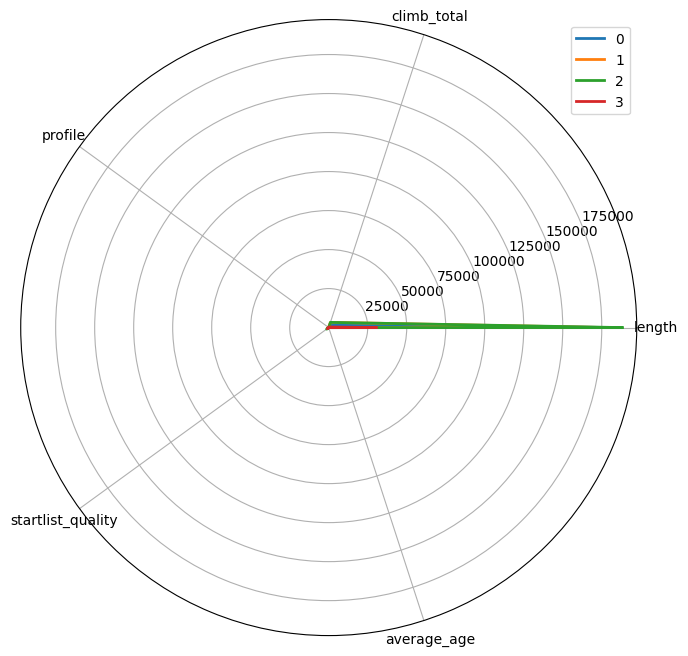

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()